# Описание проекта 

В данном проекте будет проведено исследование развлекательного приложения. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.  Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.


В рамках проекта будет изучено откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.


Изучим данные, переданные нам для работы и загрузим необходимые библиотеки. Поправим наименования колонок, изменим типы данных на корректные, заполним пропуски.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Считаем файлы и сохраним их в соответствующих датасетах

In [2]:
try:
    sessions = pd.read_csv('/datasets/visits_info_short.csv')
except:
    sessions = pd.read_csv('/Users/romanvasyliev/Downloads/visits_info_short.csv')

try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('/Users/romanvasyliev/Downloads/orders_info_short.csv')
    
try:
    ad_costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    ad_costs = pd.read_csv('/Users/romanvasyliev/Downloads/costs_info_short.csv')
    


## Проверка данных

Проверим информацию по каждому датасету, посмотрим какие значения содержатся, типы данных и наименования столбцов

In [3]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

In [4]:
sessions.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

Необходимо будет привести имена столбцов к нормальному виду, и изменить тип данных даты сессий на datetime

In [5]:
sessions.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

пропусков в данных нет - отлично. Перейдем к другому датасету.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

In [7]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

Необходимо будет привести имена столбцов к нормальному виду, и изменить тип данных даты событий на datetime

In [8]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

пропусков в данных нет - отлично. Перейдем к другому датасету.

In [9]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


* Channel — идентификатор рекламного источника,
* Dt — дата проведения рекламной кампании,
* Costs — расходы на эту кампанию.

In [10]:
ad_costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

Дату рекламной компании приведем к типу datetime и приведем имена стобца Channel к нижнему регистру

## Предобработка данных

Приведем имена столбцов к нормальному виду во всех датасетах

In [11]:
sessions.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [12]:
sessions.rename(columns={"User Id": "user_id",
                       "Region": "region",
                       'Device':'device',
                       'Channel':'channel',
                       'Session Start':'session_start',
                       'Session End':'session_end'}, inplace=True)

In [13]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [14]:
orders.rename(columns={"User Id": "user_id",
                       "Event Dt": "event_dt",
                       'Revenue':'revenue',
                       }, inplace=True)

In [15]:
ad_costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

In [16]:
ad_costs.rename(columns={'dt':'dt',
                     'Channel':'channel',
                     'costs':'costs'}, inplace = True)

Изменим типы данных в датасетах и добавим в в некоторые дополнительные столбцы, необходимые для дальнейшего анализа

In [17]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date
ad_costs['month'] = ad_costs['dt'].astype('datetime64[M]')

Проверим датасеты на уникальные значения ,дубликаты, пропуски  

In [18]:
display (sessions.isna().sum(),orders.isna().sum(), ad_costs.isna().sum())


user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
month      0
dtype: int64

In [19]:
display(sessions.duplicated().sum())
display(orders.duplicated().sum())
display(ad_costs.duplicated().sum())

0

0

0

In [20]:
sessions['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [21]:
sessions['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [22]:
sessions['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [23]:
sessions['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [24]:
sessions['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [25]:
sessions['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [26]:
ad_costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

### Вывод


В проекте исследуется 3 файла, мы исправили некорректные наименования столбцов, изменили типы данных, и добавили необходимые столбцы для дальнейшего анализа. 


Из данных файлов видно, что пользователи находятся в 4 странах и используют 4 вида платформ для доступа к приложению, больше всего пользователей из США. Было использовано 11 каналов для привлечения пользователей, больше всего пользователей, пользующихся приложением, пришло из органического ( через поисковик) канала. Количество рекламных компаний по каждому каналу было одинаковым. 

## Исследовательский анализ 

### Создание  пользовательских профилей.

Для создания профилей пользователей будем использовать функцию get_profiles()

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs,
                 #event_names=[]
                ):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles



In [28]:
profiles = get_profiles(sessions, orders, ad_costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


### Минимальная и максимальная даты привлечения пользователей.

По заданию проекта - моментом анализа станет 2019-11-01.  Горизонт анализа составит 14 дней. С учетом этих данных найдем минимальную и максимальную даты привлечения пользователей 

In [29]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

min_analys_date = sessions['session_start'].min()
print (' Минимальная дата ', min_analys_date)


max_analys_date = observation_date - timedelta(days=horizon_days - 1)
print (' Максимальная дата', max_analys_date)


 Минимальная дата  2019-05-01 00:00:41
 Максимальная дата 2019-10-19


### Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

Узнаем количество пользователей и долю платящих из каждой страны. Сгруппируем профили пользователей по региону использования, посчитав количество уникальных пользователей и количество пользователей, которые являются плательщиками в приложении. Разделим плательщиков на общее количество и добавим в столбец 'part'. А так же добавим сортировку по количеству платящих пользователей 

In [30]:
users_country = profiles.groupby(by ='region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
users_country.columns = ['total','pay','part']
users_country.sort_values(by='part', ascending=False)

,total,pay,part
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


Наибольшую часть пользователей составляют пользователи из США (100 тысяч), в тоже время пользователей из Германии Франции и Великобританиивсего 15-18 тысяч, а платяших пользователей примерно одинаковое количество 600-700шт.

###  Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи

Повторим предыдущий запрос, изменив группировку по столбцу на 'device'.

In [31]:
devices = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum','mean']})
devices.columns = ['total','pay','part']
devices.sort_values(by='part', ascending=False)

,total,pay,part
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


Доли платящих пользователей, использующих Mac или IPhone почти одинаковые и составляет 6% от общего числа пользователей.  По количеству устройств, с которых заходят в приложение, лидирует iPhone, у него почти 55 тыс. пользователей. В то время как у приложения на устройствах Mac, Android, PC количество пользователей примерно одинаковое 30-35 тысяч. 

### Рекламные источники привлечения и  каналы, из которых пришло больше всего платящих пользователей

Повторим предыдущий запрос, изменив группировку по столбцу на 'channel'.

In [32]:
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
channel['part'] = round(channel.payer / channel.user_id,2)
channel.sort_values(by='payer', ascending = False)

,user_id,payer,part
channel,,,
FaceBoom,29144,3557,0.12
TipTop,19561,1878,0.10
organic,56439,1160,0.02
WahooNetBanner,8553,453,0.05
AdNonSense,3880,440,0.11
RocketSuperAds,4448,352,0.08
LeapBob,8553,262,0.03
OppleCreativeMedia,8605,233,0.03
lambdaMediaAds,2149,225,0.10


Взгланем на распределение каналов по регионам

In [63]:
profiles.groupby(by=['region','channel'])['user_id'].count()

region         channel           
France         AdNonSense             1366
               LeapBob                2988
               OppleCreativeMedia     2991
               WahooNetBanner         2971
               lambdaMediaAds          742
               organic                6392
Germany        AdNonSense             1219
               LeapBob                2519
               OppleCreativeMedia     2562
               WahooNetBanner         2579
               lambdaMediaAds          649
               organic                5453
UK             AdNonSense             1295
               LeapBob                3046
               OppleCreativeMedia     3052
               WahooNetBanner         3003
               lambdaMediaAds          758
               organic                6421
United States  FaceBoom              29144
               MediaTornado           4364
               RocketSuperAds         4448
               TipTop                19561
               YRabb

Больше всего платящих пользователей пришло из каналов FaceBoom, TipTop, organic (из поисковых запросов - можно сказать что они самостоятельно установили приложение, и кампания на привлечение этих пользователей ничего не потратила). В тоже время если смотреть не на количество, а на процент платящих пользователей, то на второе место занимает канал AdNonSense, а organic сдвигается на последнее место с двумя процентами платящих пользователей.  Каналы FaceBoom и  TipTop ориентированы только на пользователей США

### Маркетинг

 #### Сумма расходов на маркетинг. Распределение по источникам

In [34]:
ad_costs['costs'].sum()

105497.30000000002

In [35]:
ad_costs.pivot_table(index = 'channel', aggfunc='sum').sort_values(by='costs',ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Как видно из таблицы, основные расходы на маркетинг ложатся на два канала  TipTop и FaceBoom. Посмотрим как эти затраты распределяются по времени за весь период

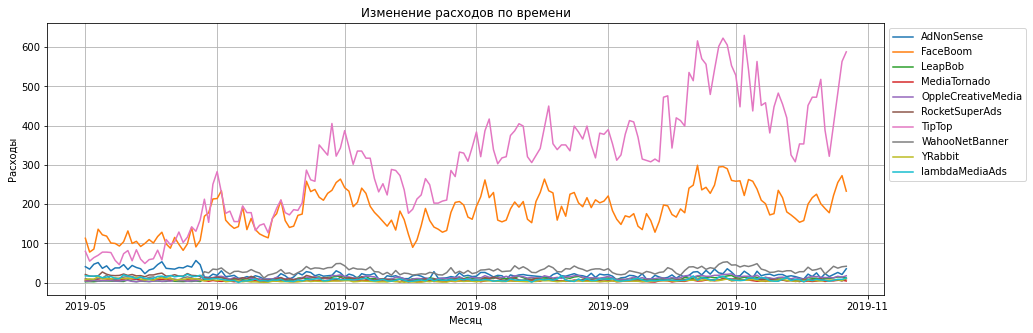

In [36]:
ad_costs.pivot_table(
    index='dt', 
    columns='channel', 
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 5), grid=True)

plt.title('Изменение расходов по времени')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()


Как видим затраты на каналы TipTop и FaceBoom с течением времени увеличиваются и они в разы отличаются от всех остальных, в то время как по остальным каналам наблюдается постоянство.

#### Привлечение одного пользователя из каждого источника. Рассчитет среднего CAC 

Стоимость привлечения пользователей в зависимости от источника у нас уже расчитывалась в функции  'get_profiles', в датасете profiles находится вся информация о профилях пользователей в том числе и стоимость их привлечения из рекламных каналов, столбец 'acquisition_cost'

In [37]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [38]:
# средний CAC по всему проекту

round(profiles['acquisition_cost'].mean(),2)

0.7

In [39]:
# средний CAC по всему проекту без органических пользователей

round(profiles.query('channel!="organic"')['acquisition_cost'].mean(),2)

1.13

In [40]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'average_cac'})



,average_cac
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


Посмотрим на графике как изменялся САС с течением времени

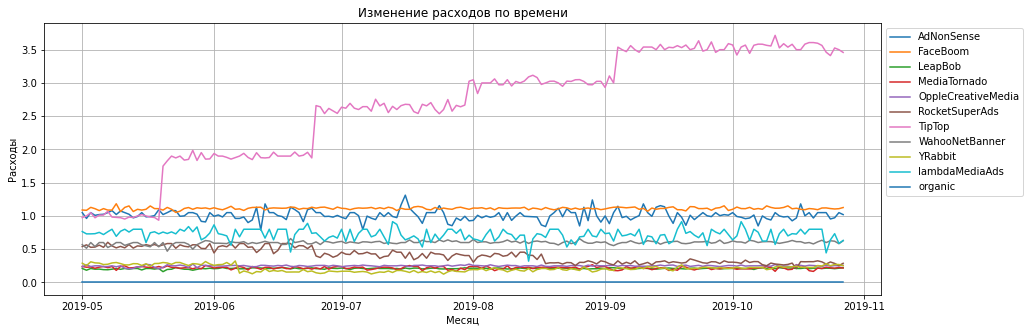

In [41]:
profiles.pivot_table(
    index='dt', 
    columns='channel', 
    values='acquisition_cost',  
    aggfunc='mean',  
).plot(figsize=(15, 5), grid=True)

plt.title('Изменение расходов по времени')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

Сгруппируя стоимость привлечения клиентов (САС) по месяцам с функцией суммирования получим общие затраты по месяцам по всем каналам привлечения.

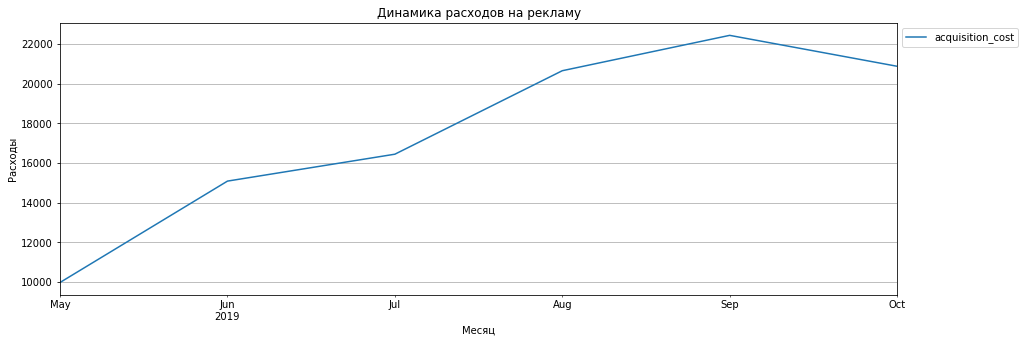

In [42]:
profiles.pivot_table(index='month',values='acquisition_cost',aggfunc='sum',).plot(figsize=(15, 5),grid=True)
plt.title('Динамика расходов на рекламу')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

Выводы:

Проведя анализ датасета по затратам на маркетинг, а так же профилей пользователей мы выяснили:
* Суммарные затраты на маркетинг составляют 105497
* Основные расходы приходятся на два канала TipTop и FaceBoom - 55 и 32 тысячи, WahooNetBanner на третьем месте по расходам с суммой 5151 	
* Средняя стоимость привлечения клиента за весь период составляет 0.7
* Средняя стоимость привлечения клиента за весь период без органических пользователей составляет 1.13
* Основной катализатор увеличения стоимости привлечения пользователя - расходы по каналу TipTop

Для анализа зависимости расходов на маркетинг и количества пользователей (платящих и нет) построим график. Сгруппируем датасеты профилей пользователей и расходов на маркетинг по столбцу 'dt' 


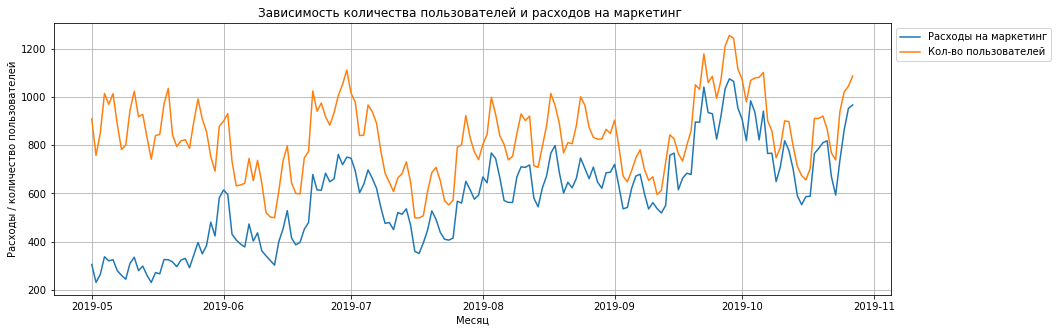

In [43]:
ad_costs.groupby(by='dt')['costs'].sum().plot(figsize=(15, 5),grid=True, label ='Расходы на маркетинг')
profiles.groupby(by='dt')['user_id'].count().plot(figsize=(15, 5),grid=True, label = 'Кол-во пользователей')

plt.title('Зависимость количества пользователей и расходов на маркетинг ')
plt.xlabel('Месяц')
plt.ylabel('Расходы / количество пользователей')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

Как видим, количество пользователей приложения начиная с июня практически синхронно двигается с графиком расходов на маркетинг, постепенно приближаясь друг к другу. Количество пользователей с начала периода практически не меняется и находится в пределах 800-1000. Расходы на привлечение клиентов постепенно увеличиваются почти в три раза с момента начала периода датасета. 

## Общая окупаемость рекламы

Оценивать окупаемость рекламы мы будем с помощью функций расчета LTV, ROI и CAC
* LTV- жизненная ценность клиента - прибыль, которую мы получим от клиента за все время работы с ним
* ROI- Окупаемость инвестиций 
* CAC- Cтоимость привлечения клиента
Для их расчета мы можем применить следующие  функции

In [44]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [45]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [46]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


Вызовем функцию для расчета LTV и ROI get_ltv. По заданию проекта - моментом анализа станет 2019-11-01. Горизонт анализа составит 14 дней. для общего анализа возьмем полный датасет включая органических пользователей и посмотрим на показатели.

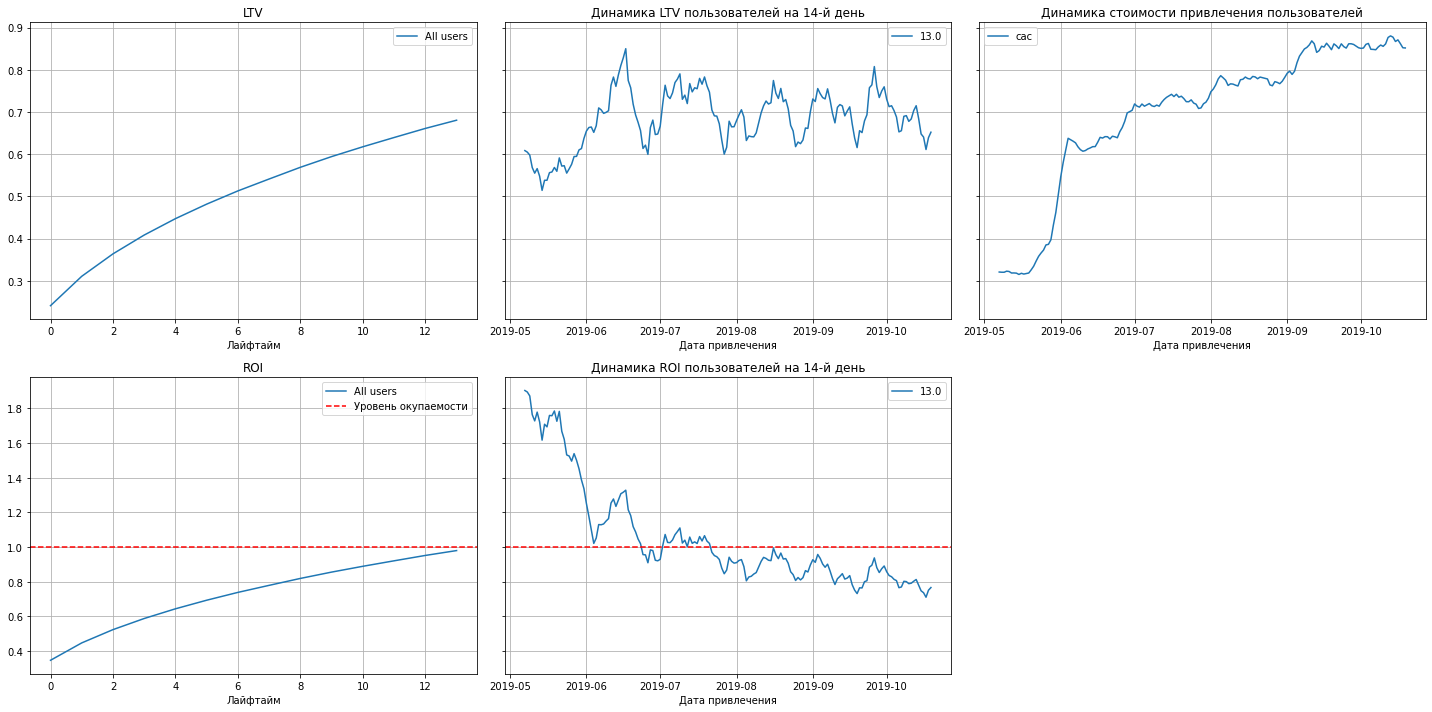

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
* Реклама на 14 -й день почти достигает значения 1 а значит окупается.
* Однако со временем ROI уменьшается и в начале июня почти достигает убыточного уровня, далее следует всплеск, видимо связанный с привлечением новых пользователей, но с середины июня коэффициент окупаемости вложений продолжает уменьшатся.
* Динамика CAC резко увеличивается с середины мая и с июня плавно продолжает расти, стоимость привлечения клиентов увеличиваетя, расходы на рекламный бюджет растут, либо же уменьшается количество пользователей приложения
* Динамика LTV показывает что среднее количество денег от одного пользователя за всю его «жизнь» в проекте имеет некоторую сезонность, пока не понятно с чем связанную. 


Проверим окупаемость рекламы, убрав из датасета органических пользователей

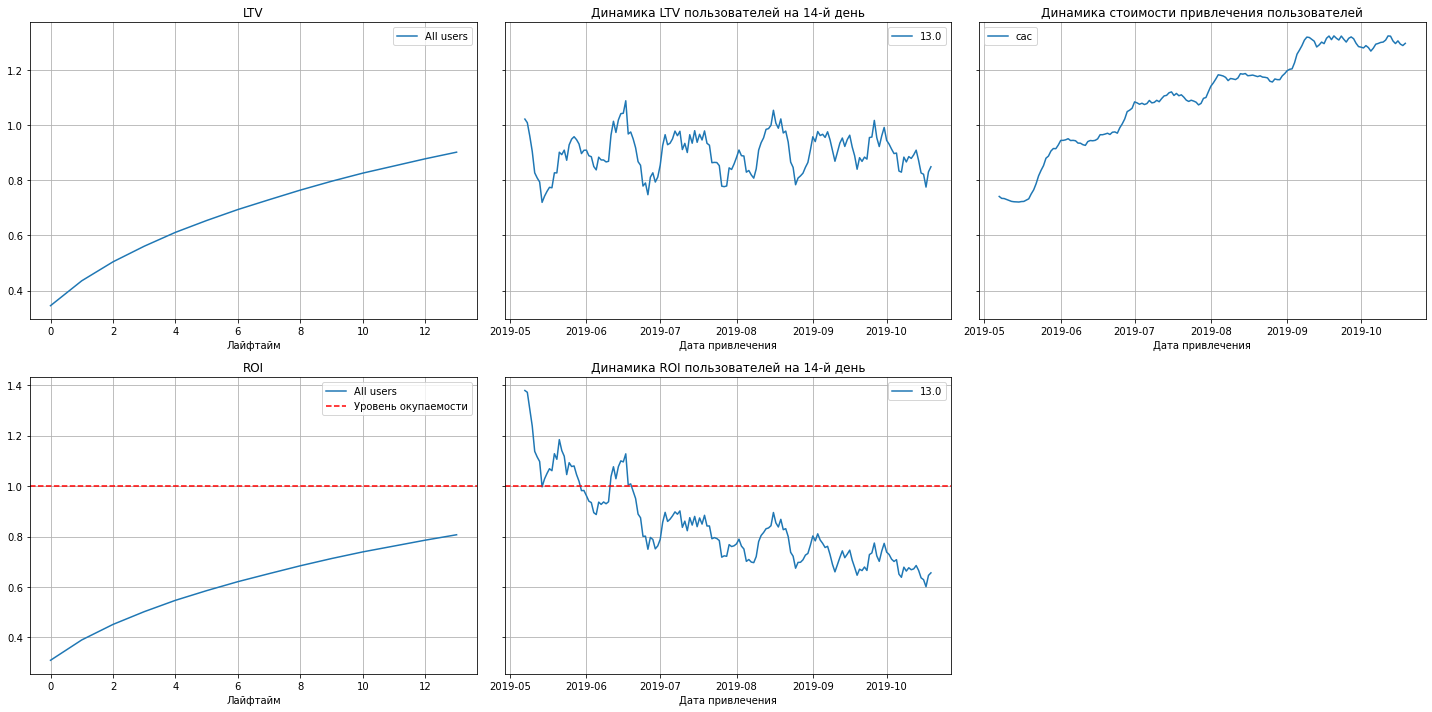

In [48]:
wo_organic = profiles.query('channel!="organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    wo_organic , orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Динамика коэффициентов для пользователей, привлеченных по рекламным каналам несколько отличается:
* Показатель LTV для меркетинговых пользователей несколько выше, средний доход по ним больше
* Однако коэффициент окупаемости ROI показывает что на 14-й день проекта затраты на маркетинг окупились только на 80 процентов




## Окупаемость рекламы с разбивкой по рекламным каналам. 

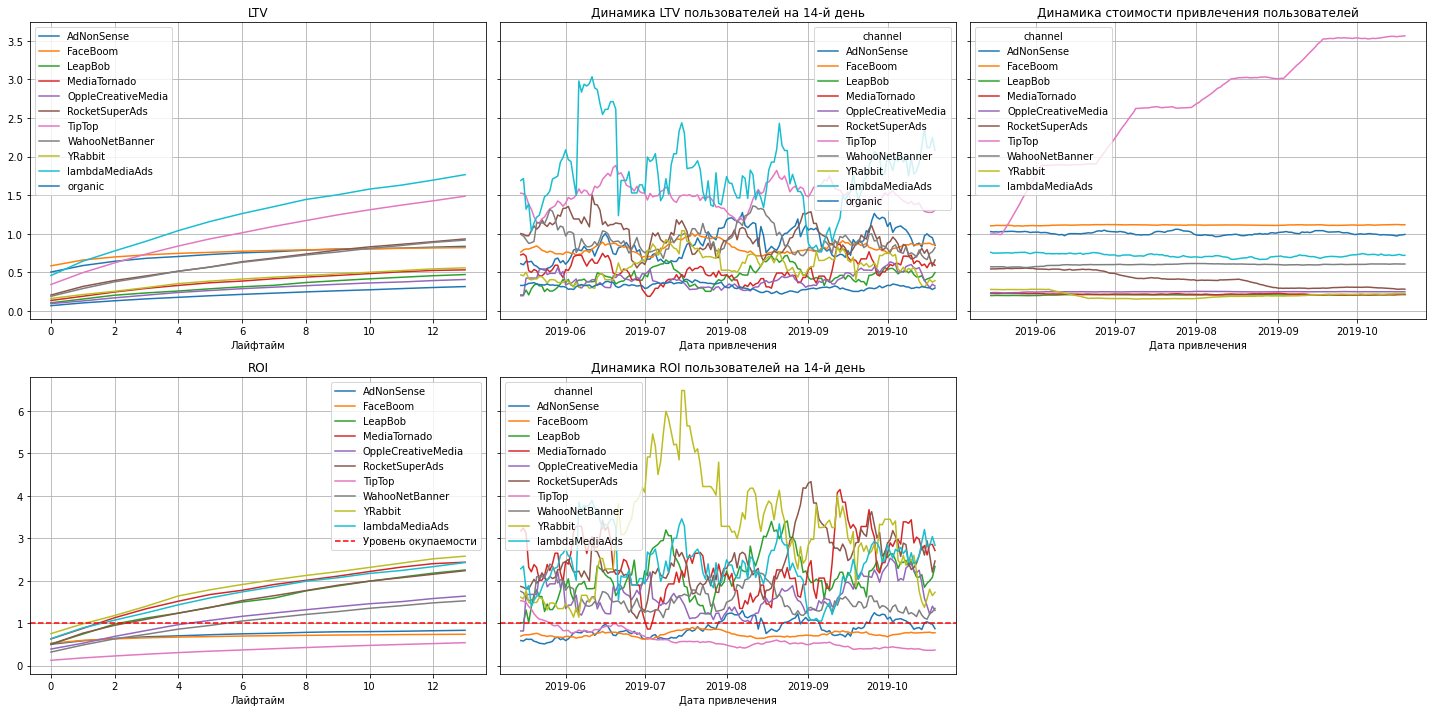

In [49]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15
)

Из графиков можно сделать следующие выводы:
* Стоимость привлечения пользователей по каналу TipTop стабильно увеличивается, в то время как коэффициенты по другим каналам привлечения стабильны 
* Пользователи из канала LambdaMediaAds приносят наибольший доход 
* За границей окупаемости находятся всего три канала привлечения AdNonSecse, FaceBoom, TipTop.
* Пользователи пришедшие из канала FaceBoom за весь период анализа ниразу не окупились 
* Пользователи пришедшие из канала TipTop в начале периода были рентабельными, но с конца мая коэффициент окупаемости вложений по этому каналу постепенно уменьшается и находится на минимальном уровне из всех
* У всех остальных каналов привлечения хорошая окупаемость, у одного (YRabbit) в июле был 6-кратное превышение вложенных инвестиций

##  Окупаемость рекламы с разбивкой по странам

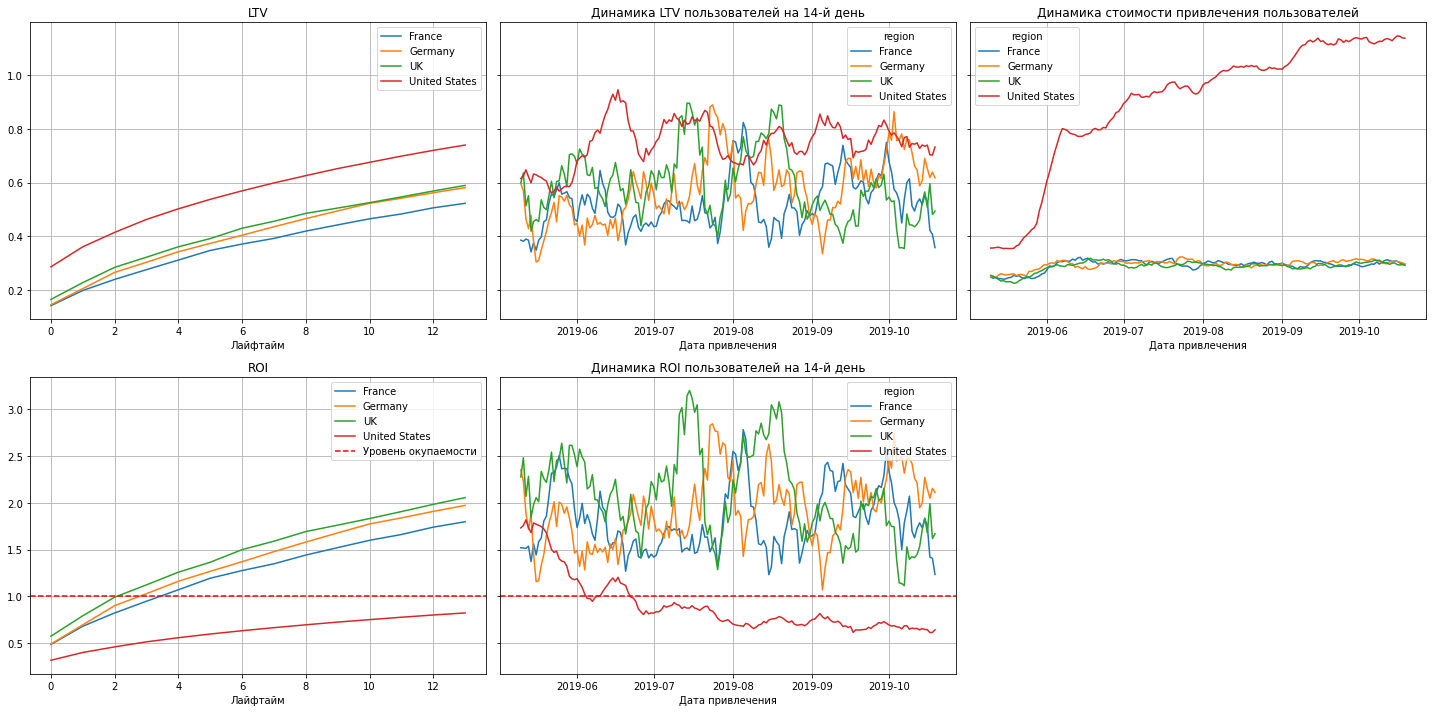

In [50]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=10
)

Из анализа графиков можно сделать следующие выводы:
* Пользователи США приносят больше денег, немецкие и английские пользователи на 14-й день регистрации приносят одинаковое количество. Пользователи Франции в среднем приносят меньше всего дохода на одного пользователя.
* Стоимость привлечения пользователей не из США находится на стабильном уровне, в отличии от маркетинговых трат на пользователей из США, которая стабильно растет в течении всего времени.
* Окупаемость инвестиций пользователей не из США происходит уже на 3-й день жизни пользователей, в отличии от затрат на маркетинг в США, которые не окупаются и по прошествии 2 недель жизни пользователя.
* Показатель ROI в динамике по США уменьшается, потому что стоимость привлечения увеличивается, в то время как средний доход от пользователей находится примерно на одном уровне.


Мы видим, что компания прилагает большие усилия, чтобы привлечь больше американских пользователей использовать приложение, маркетинговые расходы на регион америки в разы привышает расходы на другие страны. Однако средний доход с одного пользователя находится примерно на одинаковом уровне. Если затраты на маркетинг по Германии Франции и Англии окупаются уже на третий день, то кампании по привлечению американской удитории не окупаются со временем и приносят убытки. 

## Окупаемость рекламы с разбивкой по устройствам

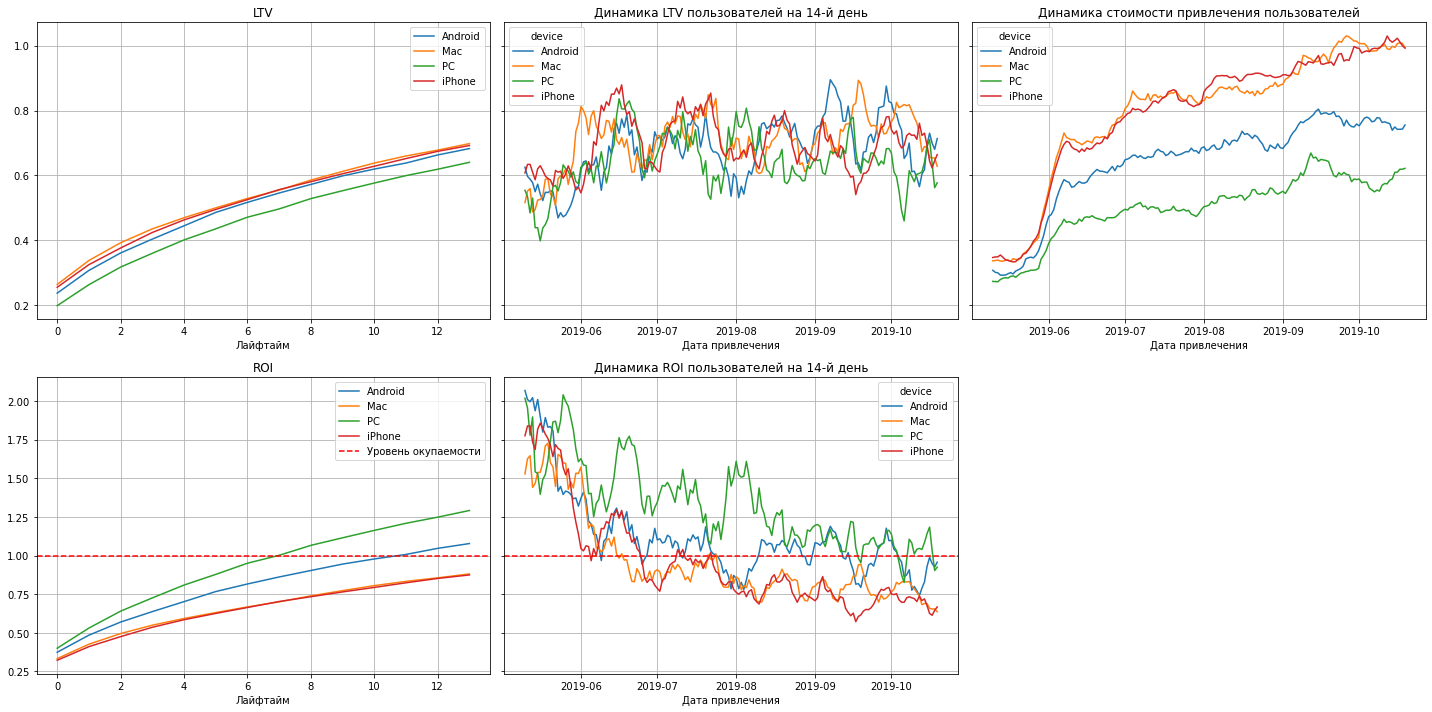

In [51]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=10
)

Как видим на 14-й день окупаются только пользователи PC  и Android, в то время как затраты на маркетинг на пользователей Mac и  IPhone не окупаются, хотя их стоимость привлечения находится на максимальном уровне. Показатель эффективности вложений по всем устроиствам снижается, лидируют по ROI. пользователи PC.

## Функции конверсии и удержания

Для расчет конверсии и удержания будем использовать функции get_conversion, get_retention. Для отрисовки графиков будем использовать функции plot_retention, plot_conversion

In [52]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [53]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time



In [54]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [55]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Конверсия и удержание с разбивкой по устройствам

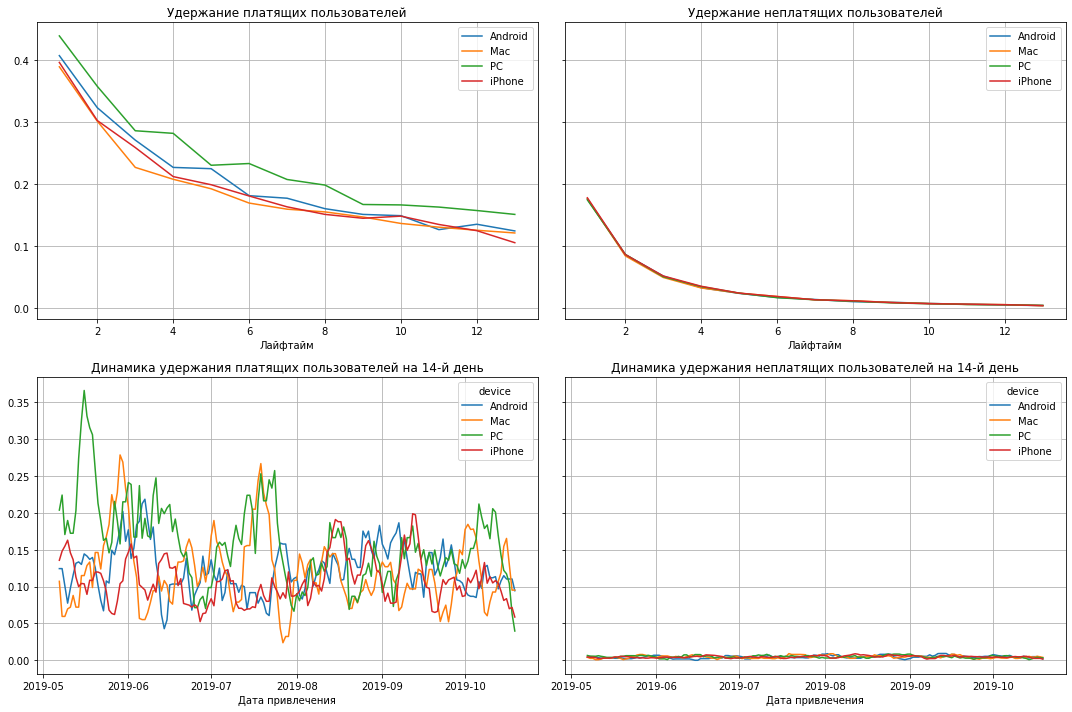

In [56]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

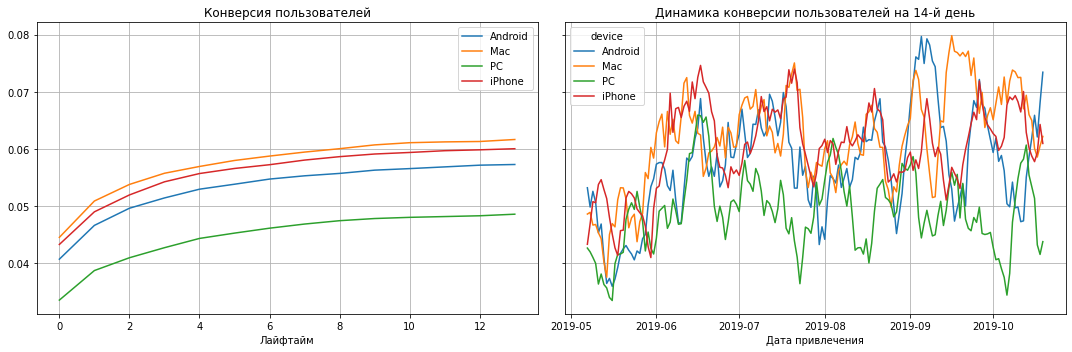

In [57]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей из пользователя в покупателя выше у пользователей Mac  и iPhone, ниже всех конверсия у пользователей приложения на PC. Динамика конверсии с течением времени не превышает 8 процентов по всем устройствам. Однако удержание платящих пользователей PC больше чем всех остальных. Удержание неплатящих пользователей приближается к нулю к концу второй недели, удержание платящих пользователей находится в среднем в пределах 10-15%. Значит примерно 13 процентов пользователей возвращаются в приложение на 14-й день использования 

 ## Конверсия и удержание с разбивкой по странам

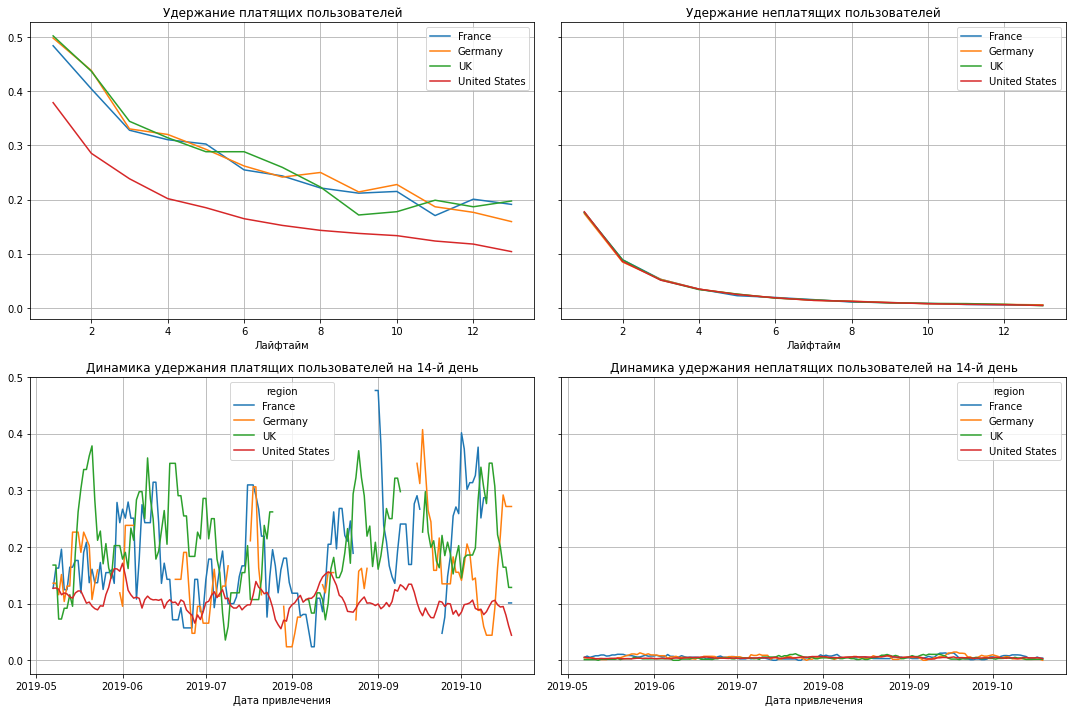

In [58]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

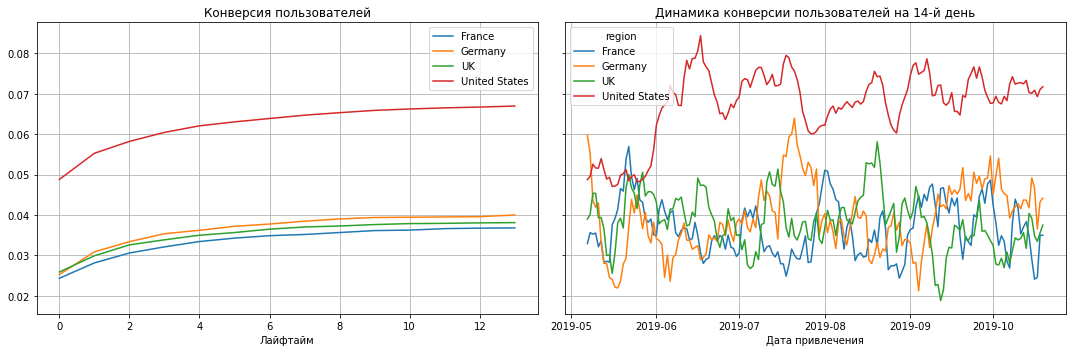

In [59]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия по пользователям США в два раза больше чем по пользователям остальных стран, значит примерно 6% пользователей приложения из США становятся покупателями, по другим странам этот показатель примерно 3-4%. Несмотря на то, что пользователи США лидируют по конверсии показатель удержания платящих пользователей  у них ниже всех остальных стран. Динамика удержания платящих пользователей США со временем в среднем держится стабильно в районе 10%, по остальным странам данные имеют более динамичный характер и составляют в среднем 20%. 

## Конверсия и удержание с разбивкой по рекламной кампании

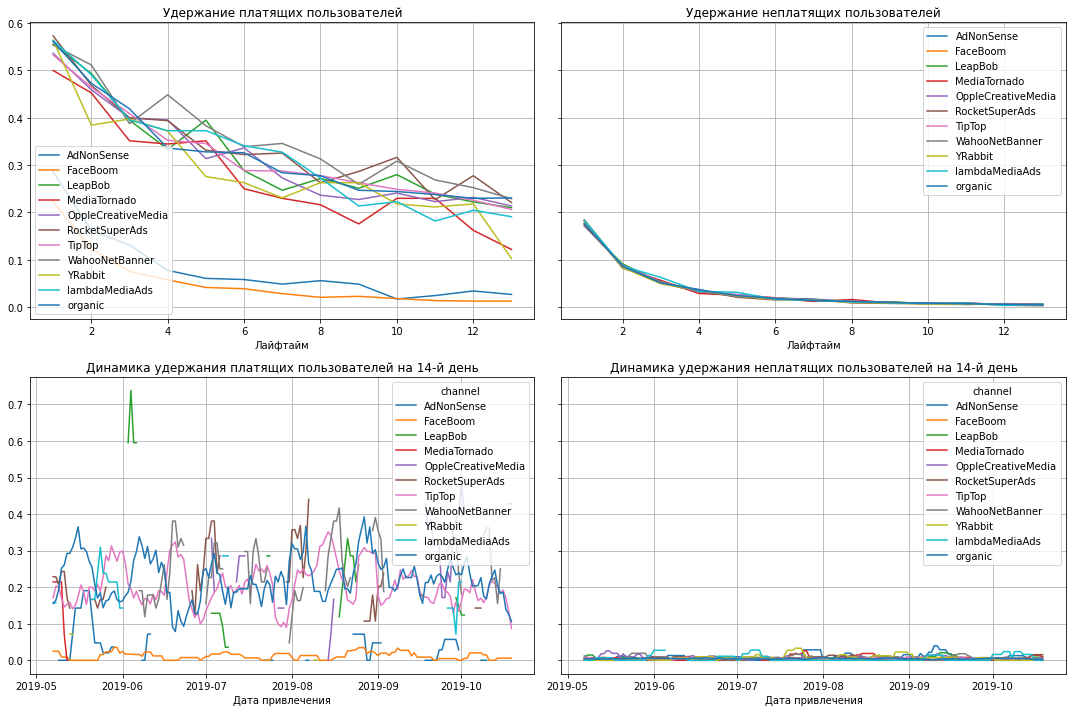

In [60]:
# смотрим удержание с разбивкой по странам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

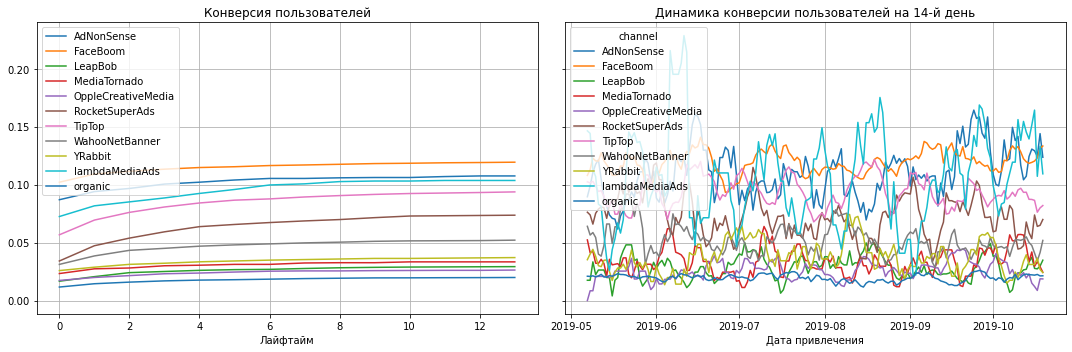

In [61]:
# смотрим конверсию с разбивкой по странам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

За первые 14 дней использования хуже всего удерживаются платящие пользователи, привлеченные из канала AdNonSense и FaceBoom, однако пользователи из этих каналов лучше всего конвертируются в платящих, примерно с такими же показателями - более 10%- могут похвастаться пользователи из канала LambdaMediaAds. Самая низкая конверсия пользователей у органических пользователей. Удержание платящих пользователей за весь период из канала FaceBoom находится практически на нуле

## Выводы и рекомендации

После проведенного анализа становится видно, что:
* Основными пользователями приложения являются американцы - 100 тыс пользователей, против пользователей из Германии, Франции и Англии по 17 тысяч пользователей
* Основные устройства входа составляют iPhone - 55 тыс. пользователей, Mac, Pc Android по 30 тыс.
* Доля платящих пользователей из америки составляет 7%, по остальным странам 4%
* Распределение по устройствам входа платящих пользователей примерно одинаковое  и составляет 5-6%
* Окупаемость проекта в целом падает
* Среднее количество денег от одного пользователя (LTV) за всю его "жизнь" за анализируемый период данных находится в пределах 0.6-0.8уе и со временем не меняется, и так как увеличиваются расходы на рекламу окупаемость инвестиций (ROI) начинает снижаться 
* Увеличивающиеся расходы на рекламу перестают окупаться c середины июля, за рассматриваемый период
* Наиболее затратными являются каналы TipTop и FaceBoom, расходы по ним со временем растут, по другим каналам затраты не изменились, эти каналы привлечения работают исключительно на пользователей из США.


При анализе расходов на маркетинг выяснилось что 
* лучше всего удерживаются пользователи Германии, Франции и Англии
* удержиние пользователей из канала FaceBoom практически на нуле, при том что расходы на него каждый месяц растут, хоть конверсия с этого канала и наивысшая - пользователи видимо после установки производят покупку и дальше приложением не пользуются
* Из-за огромного количества пользователей США их конверсия выше в 2 раза чем у остальных, однако удерживаюся платящие пользователи хуже всего

Я бы рекомендовал отделу маркетинга более рациональнее распределять средства финансирования каналов привлечения, сократить затраты на канал TipTop и FaceBoom, и обратить внимание на каналы AdNonSense и lambdaMediaAds(самый высокий процент окупаемости) - они представлены в трех странах одновременно, вместо одной (США как у  TipTop и FaceBoom). Так же затраты TipTop и FaceBoom в сумме почти в 20 раз больше чем в сумме у AdNonSense и lambdaMediaAds, и при таком финансировании у  этих каналов такой же процент платящих пользователей как и в США.